In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [4]:
df= pd.read_csv('price.csv')
df

,area,price
0,2600.0,550000.0
1,3000.0,565000.0
2,3200.0,610000.0
3,3600.0,680000.0
4,4000.0,725000.0
...,...,...
13314,NaN,NaN
13315,NaN,NaN
13316,NaN,NaN
13317,NaN,NaN


In [5]:
df = df.dropna()
df

,area,price
0,2600.0,550000.0
1,3000.0,565000.0
2,3200.0,610000.0
3,3600.0,680000.0
4,4000.0,725000.0


In [6]:
%matplotlib inline


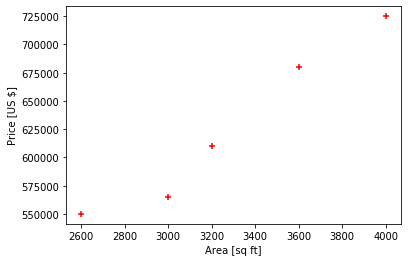

In [7]:
plt.xlabel('Area [sq ft]')
plt.ylabel('Price [US $]')
plt.scatter(df.area,df.price,color='red',marker='+')

In [8]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
reg.predict([[3300]])

array([628715.75342466])

In [10]:
reg.coef_

array([135.78767123])

In [11]:
reg.intercept_

180616.43835616432

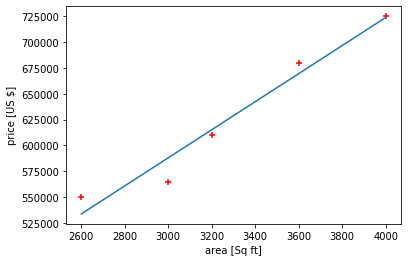

In [12]:
plt.xlabel('area [Sq ft]')
plt.ylabel('price [US $]')
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area,reg.predict(df[['area']]))

In [13]:
df2= pd.read_csv('canada_per_capita_income.csv')
df2.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


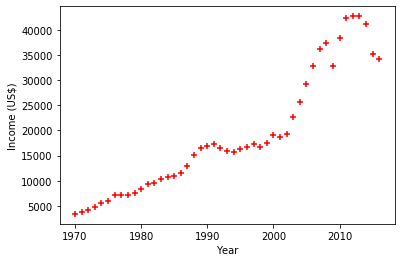

In [14]:
plt.xlabel('Year')
plt.ylabel('Income (US$)')
plt.scatter(df2.year,df2['per capita income (US$)'],color='red',marker='+')

In [15]:
reg2=linear_model.LinearRegression()
reg2.fit(df2[['year']],df2[['per capita income (US$)']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

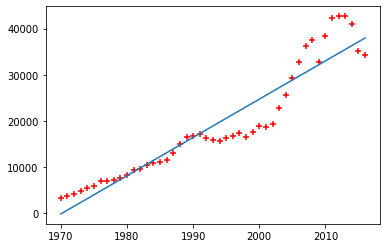

In [16]:
plt.scatter(df2['year'],df2['per capita income (US$)'],color='red',marker='+')
plt.plot(df2['year'],reg2.predict(df2[['year']]))

In [17]:
s=reg2.predict([[2020]])
s

array([[41288.69409442]])

In [18]:
df3=pd.read_csv('Areas.csv')

df3.dropna()
df3

,area
0,500
1,650
2,1200
3,1350
4,1489
5,1589
6,1604
7,1687
8,1745
9,1856


In [20]:
Estim = reg.predict(df3[['area']])
Estim

array([248510.2739726 , 268878.42465753, 343561.64383562, 363929.79452055,
       382804.28082192, 396383.04794521, 398419.8630137 , 409690.23972603,
       417565.92465753, 432638.35616438, 442143.49315068, 449068.66438356,
       450698.11643836, 454092.80821918])

In [21]:
df3['Predicted_Price'] = Estim
df3.head()

,area,Predicted_Price
0,500,248510.273973
1,650,268878.424658
2,1200,343561.643836
3,1350,363929.794521
4,1489,382804.280822


In [22]:
df3.to_csv('Areas')

In [23]:
df3.to_csv('Asareas',index=False)

In [24]:
pwd

'C:\\Users\\H'

# 

# 

In [29]:
from word2number import w2n

ModuleNotFoundError: No module named 'word2number'

In [33]:
import sys
!{sys.executable} -m  pip install word2number

  Using cached https://files.pythonhosted.org/packages/4a/29/a31940c848521f0725f0df6b25dca8917f13a2025b0e8fcbe5d0457e45e6/word2number-1.1.zip
  Created wheel for word2number: filename=word2number-1.1-cp37-none-any.whl size=5591 sha256=1748cd3ac17946025786e069f3d1c884a581312ff45bc3c7d4db833a1192f8d1
  Stored in directory: C:\Users\H\AppData\Local\pip\Cache\wheels\46\2f\53\5f5c1d275492f2fce1cdab9a9bb12d49286dead829a4078e0e
Successfully built word2number


In [42]:
import word2number
from word2number import w2n

In [43]:
df21=pd.read_csv('hiring.csv')
df21.head()


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [113]:
df22=df21.copy()
df22['experience']=df22['experience'].fillna('zero')
df22

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [114]:

df22['experience'] = df22['experience'].apply([lambda x: float(w2n.word_to_num(x)) for x in df22['experience']])


In [115]:
import math
# median or mean
df22['test_score(out of 10)']=df22['test_score(out of 10)'].fillna(math.floor(df22['test_score(out of 10)'].median()))
df22

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0.0,8.0,9,50000
1,0.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,8.0,7,72000
7,11.0,7.0,8,80000


In [116]:
reg22=linear_model.LinearRegression()
reg22.fit(df22[['experience','test_score(out of 10)','interview_score(out of 10)']],df22['salary($)'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [117]:
reg22.predict([[2,9,6]])

array([53205.96797671])

In [118]:
reg22.predict([[12,10,10]])

array([92002.18340611])